In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. 

For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [2]:
df = pd.read_csv("bikes.csv")
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [4]:
X = df.drop("cnt", axis = 1)

In [5]:
y = df["cnt"]

In [6]:
from sklearn.model_selection import train_test_split

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(random_state=2)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 79.21


In [9]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators = 25, random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Compute mse_dt
mse_rf = MSE(y_test, y_pred)

# Evaluate the test set RMSE
rmse_test =  mse_rf ** (1/2)


# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


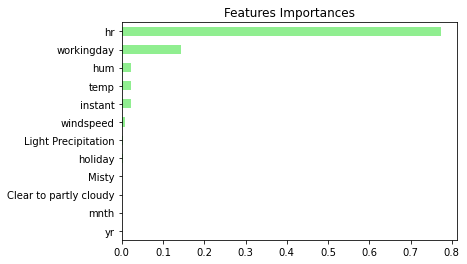

In [10]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [11]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500], "max_features":['log2', 'auto', 'sqrt'], "min_samples_leaf": [2,10,30]}

In [12]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf,scoring='neg_mean_squared_error',cv=3,verbose=1,n_jobs=-1)

## fit
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=25, random_state=2),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 350}


In [14]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** (1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 54.236
